k= 31.41838684082033


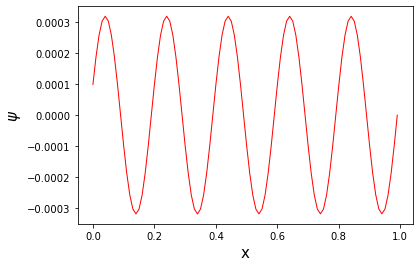

In [7]:
# -*- coding: utf-8 -*-
#无限深势阱本征值问题
from numpy import zeros
import pylab as pl
# some parameters
L = 1.0  # 区间长度
N = 100  
dt = L/N  #x步长
eps = 0.000001 #精度阶段
k =30.2  #k的初始试探值
dk = 0.1  #k的初始步长
freturn = zeros(2)
psiphi = zeros(2)
psiphitemp = zeros(2)
x = zeros(N)
psi = zeros(N)
def f1(psiphi,k):  #定义子函数  
    freturn[0] = -k*k*psiphi[1]   #phi的斜率 -k^2 psi
    freturn[1] = psiphi[0] #psi的斜率  phi
    return freturn
def rk4(dt, k, N): #四阶龙格-库塔法求出给定k时，psi(1)的值
    psiphi[0] = 0.01  #phi的初值，即左端点的phi值
    psiphi[1] = 0.0 #psi的初值，即左端点的psi值
    t = 0
    for i in range(N):  
        fR = f1(psiphi, k)
        k1 = fR[0]
        l1 = fR[1]

        psiphitemp[0] = psiphi[0] + k1*dt/2
        psiphitemp[1] = psiphi[1] + l1*dt/2
        fR = f1(psiphitemp, k)
        k2 = fR[0]
        l2 = fR[1]

        psiphitemp[0] = psiphi[0] + k2*dt/2
        psiphitemp[1] = psiphi[1] + l2*dt/2
        fR = f1(psiphitemp, k)
        k3 = fR[0]
        l3 = fR[1]

        psiphitemp[0] = psiphi[0] + k3*dt
        psiphitemp[1] = psiphi[1] + l3*dt
        fR = f1(psiphitemp, k)
        k4 = fR[0]
        l4 = fR[1]

        psiphi[0] = psiphi[0] + (k1 + 2*k2 + 2*k3 +k4)*dt/6
        psiphi[1] = psiphi[1] + (l1 + 2*l2 + 2*l3 +l4)*dt/6

        x[i] = t
        psi[i] = psiphi[1]
        t = t + dt
    return psiphi
psiphi = rk4(dt, k, N)
phiold = psiphi[1]
while abs(dk) > eps:  #搜索法求出满足psi(1)=0的k值
    k = k + dk
    psiphi = rk4(dt,k,N)
    phinew = psiphi[1]
    if phinew*phiold > 0:
       continue
    k = k - dk
    dk = dk/2
print('k=',k)
pl.plot(x, psi, 'r-',linewidth=1.0)
pl.xlabel('x',fontsize=15)
pl.ylabel('$\psi$',fontsize=15)
pl.show()